In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
39,40,2,4,8,5,3,3,1303,70000,Yes,62.5,37.5,37.5,Divided
40,41,1,4,8,5,2,3,1384,70000,No,62.5,37.5,25.0,Divided
41,42,2,4,8,7,4,1,1191,70000,No,87.5,12.5,50.0,Divided
42,43,2,4,8,4,2,4,1335,70000,No,50.0,50.0,25.0,Divided
43,44,1,4,8,6,2,2,1253,70000,No,75.0,25.0,25.0,Divided
44,45,1,4,8,8,2,0,1239,70000,No,100.0,0.0,25.0,Divided
45,46,1,4,8,7,4,1,1109,70000,No,87.5,12.5,50.0,Divided
46,47,1,4,8,8,2,0,952,70000,No,100.0,0.0,25.0,Divided
47,48,1,4,8,8,0,0,928,70000,No,100.0,0.0,0.0,Divided
48,49,1,4,8,7,3,1,1428,70000,No,87.5,12.5,37.5,Divided


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [7, 10, 11, 12]].values  
display(x)

array([[1303. ,   62.5,   37.5,   37.5],
       [1384. ,   62.5,   37.5,   25. ],
       [1191. ,   87.5,   12.5,   50. ],
       [1335. ,   50. ,   50. ,   25. ],
       [1253. ,   75. ,   25. ,   25. ],
       [1239. ,  100. ,    0. ,   25. ],
       [1109. ,   87.5,   12.5,   50. ],
       [ 952. ,  100. ,    0. ,   25. ],
       [ 928. ,  100. ,    0. ,    0. ],
       [1428. ,   87.5,   12.5,   37.5],
       [1115. ,   62.5,   37.5,   75. ],
       [1157. ,  100. ,    0. ,   25. ],
       [1097. ,   75. ,   25. ,   37.5],
       [1160. ,  100. ,    0. ,    0. ],
       [1053. ,   87.5,   12.5,   12.5],
       [ 953. ,   87.5,   12.5,    0. ],
       [1303. ,   75. ,   25. ,   37.5],
       [1257. ,   37.5,   62.5,   75. ],
       [1008. ,  100. ,    0. ,    0. ],
       [1188. ,   12.5,   87.5,   87.5],
       [ 670. ,   87.5,   12.5,   12.5],
       [ 614. ,   87.5,   12.5,   50. ],
       [ 778. ,  100. ,    0. ,   25. ],
       [ 778. ,  100. ,    0. ,   12.5],
       [ 832. , 

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[ 1.35119909, -1.05730976,  1.05730976,  0.46525043],
       [ 1.72400715, -1.05730976,  1.05730976, -0.09868948],
       [ 0.8357114 ,  0.26432744, -0.26432744,  1.02919034],
       [ 1.49848129, -1.71812836,  1.71812836, -0.09868948],
       [ 1.12107066, -0.39649116,  0.39649116, -0.09868948],
       [ 1.0566347 ,  0.92514604, -0.92514604, -0.09868948],
       [ 0.45830077,  0.26432744, -0.26432744,  1.02919034],
       [-0.2643025 ,  0.92514604, -0.92514604, -0.09868948],
       [-0.37476415,  0.92514604, -0.92514604, -1.22656931],
       [ 1.92652017,  0.26432744, -0.26432744,  0.46525043],
       [ 0.48591619, -1.05730976,  1.05730976,  2.15707017],
       [ 0.67922407,  0.92514604, -0.92514604, -0.09868948],
       [ 0.40306995, -0.39649116,  0.39649116,  0.46525043],
       [ 0.69303177,  0.92514604, -0.92514604, -1.22656931],
       [ 0.20055693,  0.26432744, -0.26432744, -0.6626294 ],
       [-0.25969994,  0.26432744, -0.26432744, -1.22656931],
       [ 1.35119909, -0.

In [5]:
x = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
x[['mean_reaction_time', 'percentage_no_of_correct_responses', 'oer', 'cer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 4.00000000e+00,  1.35119909e+00, -1.05730976e+00,
         1.05730976e+00,  4.65250428e-01],
       [ 4.00000000e+00,  1.72400715e+00, -1.05730976e+00,
         1.05730976e+00, -9.86894847e-02],
       [ 4.00000000e+00,  8.35711402e-01,  2.64327440e-01,
        -2.64327440e-01,  1.02919034e+00],
       [ 4.00000000e+00,  1.49848129e+00, -1.71812836e+00,
         1.71812836e+00, -9.86894847e-02],
       [ 4.00000000e+00,  1.12107066e+00, -3.96491160e-01,
         3.96491160e-01, -9.86894847e-02],
       [ 4.00000000e+00,  1.05663470e+00,  9.25146041e-01,
        -9.25146041e-01, -9.86894847e-02],
       [ 4.00000000e+00,  4.58300773e-01,  2.64327440e-01,
        -2.64327440e-01,  1.02919034e+00],
       [ 4.00000000e+00, -2.64302505e-01,  9.25146041e-01,
        -9.25146041e-01, -9.86894847e-02],
       [ 4.00000000e+00, -3.74764152e-01,  9.25146041e-01,
        -9.25146041e-01, -1.22656931e+00],
       [ 4.00000000e+00,  1.92652017e+00,  2.64327440e-01,
        -2.64327440e-01

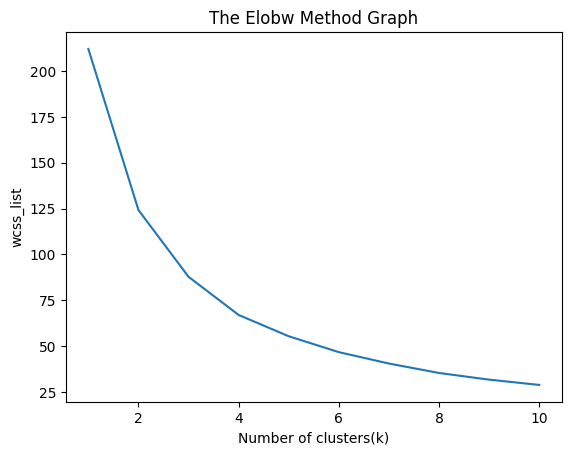

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)


[1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [8]:
new_df = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
39,4,1303,62.5,37.5,37.5,1
40,4,1384,62.5,37.5,25.0,1
41,4,1191,87.5,12.5,50.0,1
42,4,1335,50.0,50.0,25.0,1
43,4,1253,75.0,25.0,25.0,1
44,4,1239,100.0,0.0,25.0,0
45,4,1109,87.5,12.5,50.0,1
46,4,952,100.0,0.0,25.0,0
47,4,928,100.0,0.0,0.0,0
48,4,1428,87.5,12.5,37.5,1


In [9]:
# save the model to disk
import pickle
filename = 'modelda.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [10]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

print("Silhouette Coefficient: %0.3f" % silhouette_score(x, y_predict))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, y_predict))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, y_predict))

Silhouette Coefficient: 0.377
Calinski-Harabasz Index: 26.852
Davies-Bouldin Index: 1.061


# Cluster Analysis

## Cluster 1

In [11]:
len(new_df[new_df["clusters"] == 0])

27

In [12]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
44,4,1239,100.0,0.0,25.0,0
46,4,952,100.0,0.0,25.0,0
47,4,928,100.0,0.0,0.0,0
50,5,1157,100.0,0.0,25.0,0
52,5,1160,100.0,0.0,0.0,0
53,5,1053,87.5,12.5,12.5,0
54,5,953,87.5,12.5,0.0,0
57,5,1008,100.0,0.0,0.0,0
59,6,670,87.5,12.5,12.5,0
60,6,614,87.5,12.5,50.0,0


In [13]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['mean_reaction_time'].max()
minVal = cluster_0['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  586
mean_reaction_time max -  1239

percentage_no_of_correct_responses min -  62.5
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  37.5

cer min -  0.0
cer max -  62.5


## Cluster 2

In [14]:
len(new_df[new_df["clusters"] == 1])

13

In [15]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
39,4,1303,62.5,37.5,37.5,1
40,4,1384,62.5,37.5,25.0,1
41,4,1191,87.5,12.5,50.0,1
42,4,1335,50.0,50.0,25.0,1
43,4,1253,75.0,25.0,25.0,1
45,4,1109,87.5,12.5,50.0,1
48,4,1428,87.5,12.5,37.5,1
49,4,1115,62.5,37.5,75.0,1
51,5,1097,75.0,25.0,37.5,1
55,5,1303,75.0,25.0,37.5,1


In [16]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  832
mean_reaction_time max -  1428

percentage_no_of_correct_responses min -  12.5
percentage_no_of_correct_responses max -  87.5

oer min -  12.5
oer max -  87.5

cer min -  25.0
cer max -  87.5
